<div style="text-align: center; color:rgb(0, 0, 0); font-family: Arial, sans-serif; background-color:rgb(137, 200, 129); padding: 10px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 1.2); line-height: 0.1;">

### **Series de Tiempo**
#### **Universidad Central**
#### Maestría en Analítica de Datos
#### Docente: Wilson Sandoval Rodriguez
##### wsandovalr@ucentral.edu.co

</div>

##  ▶️ **MODELO SARIMA**

Al modelo ARIMA se le pueden hacer varias modificaciones para tener en cuenta el comportamiento estacional y no estacionario. A menudo, la dependencia del pasado tiende a ocurrir con más fuerza en múltiplos de algunos rezagos estacionales $s$


- Los datos económicos mensuales, hay una fuerte
componente anual que ocurre en rezagos que son múltiplos de $s = 12$, debido a las fuertes conexiones de toda la actividad con el año calendario.


- Es apropiado introducir polinomios de media móvil y autorregresivos.
que se identifican con los rezagos estacionales. El autorregresivo estacional puro resultante modelo de promedio móvil,  $ARMA (P, Q)_s$, 

$$
\Phi_{P}\left(B^{s}\right) x_{t}=\Theta_{Q}\left(B^{s}\right) w_{t}
$$


Donde
$$
\Phi_{P}\left(B^{s}\right)=1-\Phi_{1} B^{s}-\Phi_{2} B^{2 s}-\cdots-\Phi_{P} B^{P s}
$$
y
$$
\Theta_{Q}\left(B^{s}\right)=1+\Theta_{1} B^{s}+\Theta_{2} B^{2 s}+\cdots+\Theta_{Q} B^{Q s}
$$

son los operador autorregresivos estacional y de media móvil estacional
 de órdenes $P$ y $Q$, respectivamente, con período estacional $s$.




####  🎨 **Ejemplo:**

Una Serie de medias móviles autorregresivas estacionales de primer orden  podrían escribirse como:


$$\left(1-\Phi B^{12}\right) x_{t}=\left(1+\Theta B^{12}\right) w_{t}$$
o
$$x_{t}=\Phi x_{t-12}+w_{t}+\Theta w_{t-12}$$




## 

 💻 **Definición:**  El modelo  autorregresivo estacional multiplicativo integrado
 de media móvil, o modelo **SARIMA**, de Box y Jenkins (1970) es dado por


$$
\Phi_{P}\left(B^{s}\right) \phi(B) \nabla_{s}^{D} \nabla^{d} x_{t}=\alpha+\Theta_{Q}\left(B^{s}\right) \theta(B) w_{t}
$$



donde $w_t$ es el proceso habitual de ruido blanco. El modelo general se denota como  $ARIMA (p, d, q) × (P, D, Q)_s$.

- Las componentes  autorregresivas  y  de media móvil ordinarias están representados por polinomios $\phi(B)$ y $\theta(B)$ de ordenes $p$ y $q$, respectivamente.


- Las componentes autorregresivo y de medias moviles estacional  $\Phi(B)$ y $\Theta(B)$

- Las diferencias ordinarias y estacionales son respectivamente $\nabla^{d}=(1-B)^d$   y $\nabla_{s}^{D}=(1-B^s)^D$




#### **Ejemplo**:

El modelo $SARIMA(0, 1, 1) × (0, 1, 1)_{12}$ se representa como:


$$\left(1-B^{12}\right)(1-B) x_{t}=\left(1+\Theta B^{12}\right)(1+\theta B) w_{t}$$

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from arch.unitroot import PhillipsPerron
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot
from statsmodels.sandbox.stats.runs import runstest_1samp

import hvplot.pandas

import warnings
warnings.filterwarnings("ignore")


<div style=" font-family: Arial, sans-serif; background-color:rgba(31, 179, 248, 0.18); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

La Gran Encuesta Integrada de Hogares (GEIH) proporciona información detallada sobre la estructura y dinámica del mercado laboral en el país. Se presentan indicadores clave como el porcentaje de población en edad de trabajar, la Tasa Global de Participación (TGP), la Tasa de Ocupación (TO) y la Tasa de Desocupación (TD), permitiendo evaluar la evolución de la actividad económica y el empleo.  Asimismo, se detallan variables como la población total, la población en edad de trabajar (PET), la fuerza de trabajo, la población ocupada, la población desocupada y la población fuera de la fuerza de trabajo, permitiendo un análisis integral de la estructura del empleo y la disponibilidad de mano de obra en el país.

Revisar: Ficha tecnica:  https://www.dane.gov.co/index.php/estadisticas-por-tema/mercado-laboral/empleo-y-desempleo


In [2]:
df=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/Tasa%20global%20de%20participacion.xlsx", sheet_name="Total nacional", skiprows=11)
df

,Concepto,2001,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,2025
0,NaN,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,...,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic,Ene
1,% población en edad de trabajar,68.372188,68.40037,68.425957,68.453948,68.481856,68.511451,68.531742,68.56128,68.590471,...,77.760543,77.788483,77.817218,77.840614,77.867971,77.894464,77.919249,77.944304,77.968249,77.992931
2,Tasa Global de Participación (TGP),69.053538,68.948903,68.387911,65.224009,65.406094,66.333465,66.743119,67.43828,68.307616,...,63.967826,64.109201,63.70223,64.166218,64.498311,63.487008,63.905362,63.732815,64.373276,64.115859
3,Tasa de Ocupación (TO),57.575237,56.928209,57.57446,55.756693,56.225804,56.176257,56.608967,57.380865,58.693903,...,57.157354,57.50219,57.160909,57.80212,58.26606,57.687802,58.068399,58.526632,58.499024,56.655314
4,Tasa de Desocupación (TD),16.622326,17.434206,15.811933,14.515078,14.035833,15.312343,15.183815,14.913511,14.074146,...,10.646716,10.305871,10.26859,9.918145,9.662658,9.134477,9.13376,8.168763,9.125295,11.636037
5,Tasa de Subocupación (TS),11.825744,11.677268,11.972872,10.46648,10.633666,9.962697,14.264066,13.207737,14.201084,...,8.364653,8.255595,7.982516,7.718751,7.383395,7.889967,8.142949,7.483779,6.972549,7.68885
6,TCSD,28.448071,29.111474,27.784805,24.981558,24.669499,25.27504,29.447881,28.121249,28.27523,...,19.011368,18.561466,18.251106,17.636896,17.046053,17.024444,17.276709,15.652542,16.097844,19.324886
7,TCDFTP,0,0,0,0,0,0,0,0,0,...,15.958655,15.389797,15.633438,14.832393,14.404138,14.322988,14.278952,12.841622,14.147315,17.490965
8,MCSFT,0,0,0,0,0,0,0,0,0,...,23.826039,23.17746,23.138696,22.130062,21.400006,21.76243,21.960816,19.944587,20.734539,24.670358
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df=df.iloc[0:7,]
df

,Concepto,2001,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,2025
0,NaN,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,...,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic,Ene
1,% población en edad de trabajar,68.372188,68.40037,68.425957,68.453948,68.481856,68.511451,68.531742,68.56128,68.590471,...,77.760543,77.788483,77.817218,77.840614,77.867971,77.894464,77.919249,77.944304,77.968249,77.992931
2,Tasa Global de Participación (TGP),69.053538,68.948903,68.387911,65.224009,65.406094,66.333465,66.743119,67.43828,68.307616,...,63.967826,64.109201,63.70223,64.166218,64.498311,63.487008,63.905362,63.732815,64.373276,64.115859
3,Tasa de Ocupación (TO),57.575237,56.928209,57.57446,55.756693,56.225804,56.176257,56.608967,57.380865,58.693903,...,57.157354,57.50219,57.160909,57.80212,58.26606,57.687802,58.068399,58.526632,58.499024,56.655314
4,Tasa de Desocupación (TD),16.622326,17.434206,15.811933,14.515078,14.035833,15.312343,15.183815,14.913511,14.074146,...,10.646716,10.305871,10.26859,9.918145,9.662658,9.134477,9.13376,8.168763,9.125295,11.636037
5,Tasa de Subocupación (TS),11.825744,11.677268,11.972872,10.46648,10.633666,9.962697,14.264066,13.207737,14.201084,...,8.364653,8.255595,7.982516,7.718751,7.383395,7.889967,8.142949,7.483779,6.972549,7.68885
6,TCSD,28.448071,29.111474,27.784805,24.981558,24.669499,25.27504,29.447881,28.121249,28.27523,...,19.011368,18.561466,18.251106,17.636896,17.046053,17.024444,17.276709,15.652542,16.097844,19.324886


In [4]:
df1 = df.set_index('Concepto').transpose().reset_index() 

In [5]:
df1

Concepto,index,NaN,% población en edad de trabajar,Tasa Global de Participación (TGP),Tasa de Ocupación (TO),Tasa de Desocupación (TD),Tasa de Subocupación (TS),TCSD
0,2001,Ene,68.372188,69.053538,57.575237,16.622326,11.825744,28.448071
1,Unnamed: 2,Feb,68.40037,68.948903,56.928209,17.434206,11.677268,29.111474
2,Unnamed: 3,Mar,68.425957,68.387911,57.57446,15.811933,11.972872,27.784805
3,Unnamed: 4,Abr,68.453948,65.224009,55.756693,14.515078,10.46648,24.981558
4,Unnamed: 5,May,68.481856,65.406094,56.225804,14.035833,10.633666,24.669499
...,...,...,...,...,...,...,...,...
284,Unnamed: 285,Sep,77.894464,63.487008,57.687802,9.134477,7.889967,17.024444
285,Unnamed: 286,Oct,77.919249,63.905362,58.068399,9.13376,8.142949,17.276709
286,Unnamed: 287,Nov,77.944304,63.732815,58.526632,8.168763,7.483779,15.652542
287,Unnamed: 288,Dic,77.968249,64.373276,58.499024,9.125295,6.972549,16.097844


In [6]:
Fecha=pd.date_range(start="2001-01-01",  end="2025-02-01", freq="ME")
Fecha

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31',
               '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30',
               '2024-12-31', '2025-01-31'],
              dtype='datetime64[ns]', length=289, freq='ME')

In [7]:
df1["Fecha"]=Fecha

In [8]:
df1.set_index("Fecha" , inplace=True)
df1

Concepto,index,NaN,% población en edad de trabajar,Tasa Global de Participación (TGP),Tasa de Ocupación (TO),Tasa de Desocupación (TD),Tasa de Subocupación (TS),TCSD
Fecha,,,,,,,,
2001-01-31,2001,Ene,68.372188,69.053538,57.575237,16.622326,11.825744,28.448071
2001-02-28,Unnamed: 2,Feb,68.40037,68.948903,56.928209,17.434206,11.677268,29.111474
2001-03-31,Unnamed: 3,Mar,68.425957,68.387911,57.57446,15.811933,11.972872,27.784805
2001-04-30,Unnamed: 4,Abr,68.453948,65.224009,55.756693,14.515078,10.46648,24.981558
2001-05-31,Unnamed: 5,May,68.481856,65.406094,56.225804,14.035833,10.633666,24.669499
...,...,...,...,...,...,...,...,...
2024-09-30,Unnamed: 285,Sep,77.894464,63.487008,57.687802,9.134477,7.889967,17.024444
2024-10-31,Unnamed: 286,Oct,77.919249,63.905362,58.068399,9.13376,8.142949,17.276709
2024-11-30,Unnamed: 287,Nov,77.944304,63.732815,58.526632,8.168763,7.483779,15.652542


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2001-01-31 to 2025-01-31
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   index                               289 non-null    object
 1   nan                                 289 non-null    object
 2   % población en edad de trabajar     289 non-null    object
 3   Tasa Global de Participación (TGP)  289 non-null    object
 4   Tasa de Ocupación (TO)              289 non-null    object
 5   Tasa de Desocupación (TD)           289 non-null    object
 6   Tasa de Subocupación (TS)           289 non-null    object
 7   TCSD                                289 non-null    object
dtypes: object(8)
memory usage: 20.3+ KB


In [10]:
df1["Tasa de Desocupación (TD)"]=pd.to_numeric(df1["Tasa de Desocupación (TD)"])

In [11]:
df1.columns

Index([                             'index',
                                        nan,
         '% población en edad de trabajar ',
       'Tasa Global de Participación (TGP)',
                   'Tasa de Ocupación (TO)',
                'Tasa de Desocupación (TD)',
                'Tasa de Subocupación (TS)',
                                     'TCSD'],
      dtype='object', name='Concepto')

In [12]:
df1.drop(columns=["index", np.nan], axis=1, inplace=True)

In [13]:
df1

Concepto,% población en edad de trabajar,Tasa Global de Participación (TGP),Tasa de Ocupación (TO),Tasa de Desocupación (TD),Tasa de Subocupación (TS),TCSD
Fecha,,,,,,
2001-01-31,68.372188,69.053538,57.575237,16.622326,11.825744,28.448071
2001-02-28,68.40037,68.948903,56.928209,17.434206,11.677268,29.111474
2001-03-31,68.425957,68.387911,57.57446,15.811933,11.972872,27.784805
2001-04-30,68.453948,65.224009,55.756693,14.515078,10.46648,24.981558
2001-05-31,68.481856,65.406094,56.225804,14.035833,10.633666,24.669499
...,...,...,...,...,...,...
2024-09-30,77.894464,63.487008,57.687802,9.134477,7.889967,17.024444
2024-10-31,77.919249,63.905362,58.068399,9.133760,8.142949,17.276709
2024-11-30,77.944304,63.732815,58.526632,8.168763,7.483779,15.652542


In [14]:
z1=pd.DataFrame(df1["Tasa de Desocupación (TD)"])


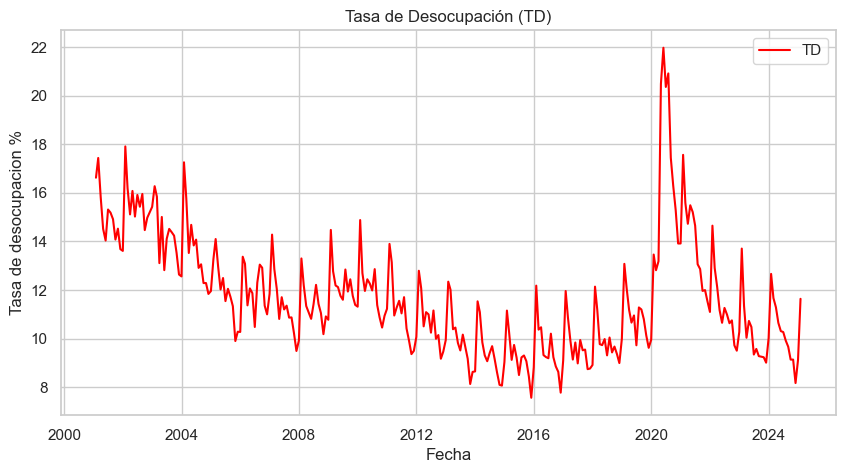

In [15]:
sns.set_theme(style="whitegrid")
# Graficar la serie original
plt.figure(figsize=(10,5))
plt.plot(z1, color="red", label="TD")
plt.title("Tasa de Desocupación (TD)")
plt.xlabel("Fecha")
plt.ylabel("Tasa de desocupacion %")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
z1["Tasa de Desocupación (TD)"].hvplot()

:Curve   [Fecha]   (Tasa de Desocupación (TD))

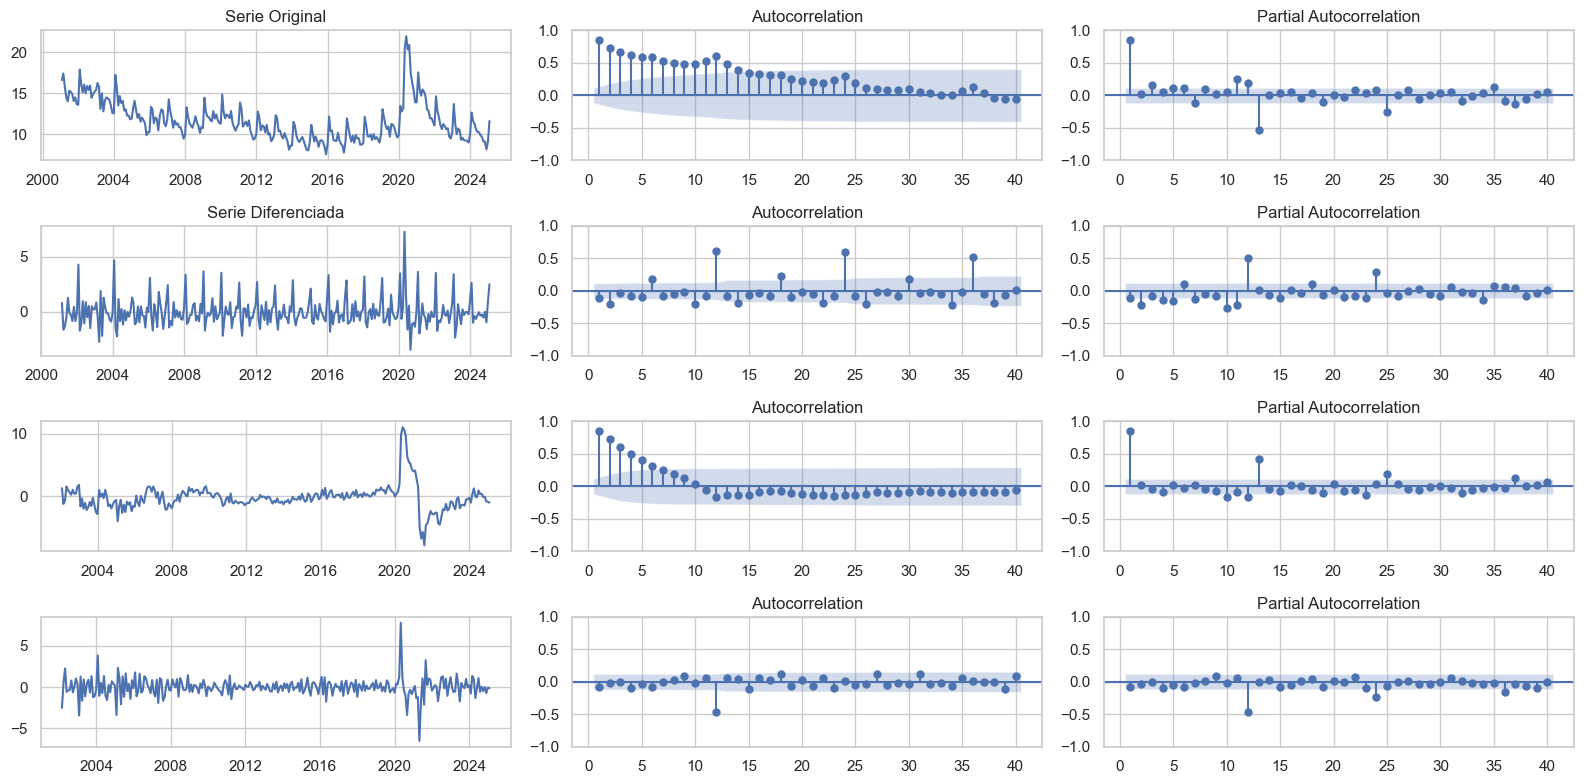

In [17]:
fig, ax = plt.subplots(4, 3, figsize=(16, 8))
ax[0, 0].plot(z1)
ax[0, 0].set_title("Serie Original")
plot_acf(z1, ax=ax[0, 1], lags=40, zero=False)
plot_pacf(z1, ax=ax[0, 2], lags=40, zero=False)
ax[1, 0].plot(z1.diff().dropna())
ax[1, 0].set_title("Serie Diferenciada")
plot_acf(z1.diff().dropna(), ax=ax[1, 1], lags=40,  zero=False)
plot_pacf(z1.diff().dropna(), ax=ax[1, 2], lags=40, zero=False)

ax[2,0].plot(z1.diff(12).dropna())
plot_acf(z1.diff(12).dropna(),ax[2,1], lags=40, zero=False)
plot_pacf(z1.diff(12).dropna(), ax[2,2], lags=40, zero=False)

ax[3,0].plot(z1.diff(12).diff().dropna())
plot_acf(z1.diff(12).diff().dropna(),ax[3,1], lags=40, zero=False)
plot_pacf(z1.diff(12).diff().dropna(), ax[3,2], lags=40, zero=False)


plt.tight_layout()
plt.show()


In [18]:
print("Prueba de Dickey-Fuller (ADF) - Serie Original:")
adf_result = adfuller(z1, autolag="AIC", maxlag=5)
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")

Prueba de Dickey-Fuller (ADF) - Serie Original:
ADF Statistic: -2.789666717590052
P-Value: 0.05976503125722974


In [19]:
print("\nPrueba de Phillips-Perron (PP) - Serie Original:")
pp_result = PhillipsPerron(z1)
print(f"PP Statistic: {pp_result.stat}")
print(f"P-Value: {pp_result.pvalue}")


Prueba de Phillips-Perron (PP) - Serie Original:
PP Statistic: -5.140563797661994
P-Value: 1.161169760850693e-05


### Diferenciación de la serie d=1


In [20]:
z1_diff = z1.diff().dropna()

print("\nPrueba de Dickey-Fuller (ADF) - Serie Diferenciada:")
adf_result_diff = adfuller(z1_diff)
print(f"ADF Statistic: {adf_result_diff[0]}")
print(f"P-Value: {adf_result_diff[1]}")



Prueba de Dickey-Fuller (ADF) - Serie Diferenciada:
ADF Statistic: -4.759948678647895
P-Value: 6.483802301383932e-05


In [21]:
print("\nPrueba de Phillips-Perron (PP) - Serie Diferenciada:")
pp_result_diff = PhillipsPerron(z1_diff)
print(f"PP Statistic: {pp_result_diff.stat}")
print(f"P-Value: {pp_result_diff.pvalue}")



Prueba de Phillips-Perron (PP) - Serie Diferenciada:
PP Statistic: -23.450785548840397
P-Value: 0.0


## Diferencia estacional D=1

In [22]:
print("Prueba de Dickey-Fuller (ADF) - D=1")
adf_result_D = adfuller(z1.diff(12).dropna(), autolag="AIC", maxlag=5) 
print(f"ADF Statistic: {adf_result_D[0]}")
print(f"P-Value: {adf_result_D[1]}")

Prueba de Dickey-Fuller (ADF) - D=1
ADF Statistic: -4.733709302549552
P-Value: 7.270212739979553e-05


In [23]:
print("Phillips Perron D=1"  )
pp_result_D = PhillipsPerron(z1.diff(12).dropna())
print(f"PP Statistic: {pp_result_D.stat}")
print(f"P-Value: {pp_result_D}")

Phillips Perron D=1
PP Statistic: -4.647922495716403
P-Value:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.648
P-value                         0.000
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### Pruebas con unda diferencia ordinaria y una estacional d=1  , D=1

In [24]:
print("Prueba de Dickey-Fuller (ADF) - D=1, d=1")
adf_result_D_d = adfuller(z1.diff(12).diff().dropna(), autolag="AIC", maxlag=5)
print(f"ADF Statistic: {adf_result_D_d[0]}")
print(f"P-Value: {adf_result_D_d[1]}")

Prueba de Dickey-Fuller (ADF) - D=1, d=1
ADF Statistic: -18.174395509726384
P-Value: 2.442246847428749e-30


In [25]:
print("Phillips Perron D=1, d=1"  )
pp_result_D_d = PhillipsPerron(z1.diff(12).diff().dropna())
print(f"PP Statistic: {pp_result_D_d.stat}")
print(f"P-Value: {pp_result_D_d}")

Phillips Perron D=1, d=1
PP Statistic: -19.864361019789055
P-Value:      Phillips-Perron Test (Z-tau)    
Test Statistic                -19.864
P-value                         0.000
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


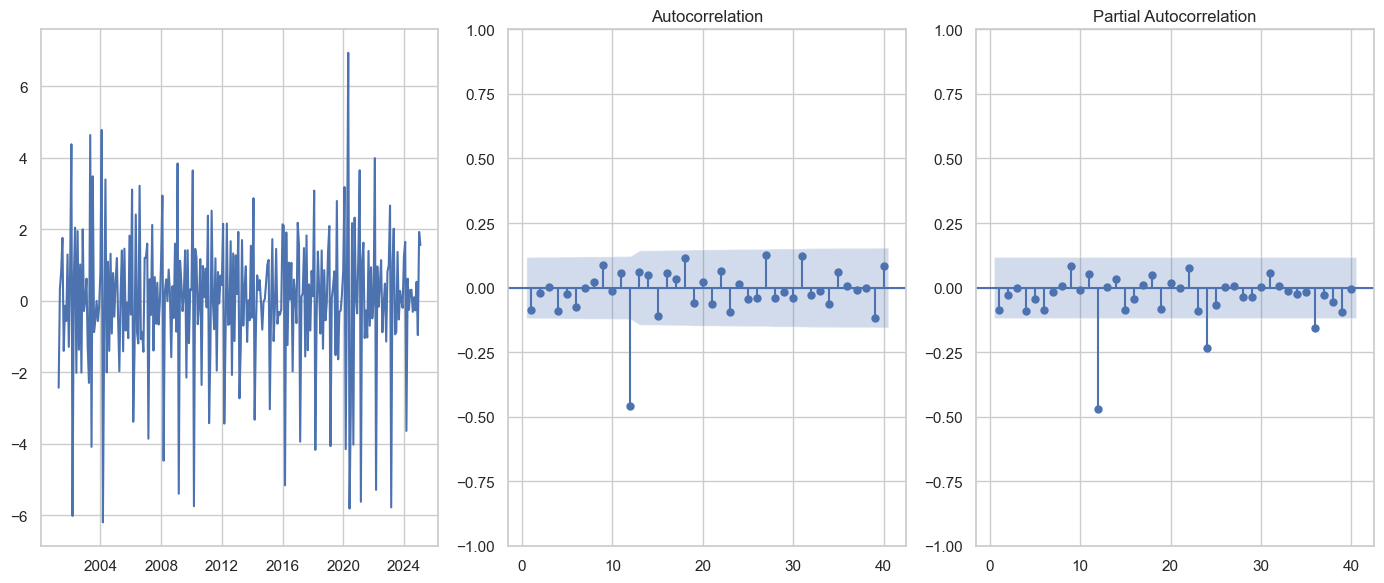

In [26]:
fig, ax=plt.subplots(1,3, figsize=(14,6))

ax[0].plot(z1.diff().diff().dropna())
plot_acf(z1.diff(12).diff().dropna(),ax[1], lags=40, zero=False)
plot_pacf(z1.diff(12).diff().dropna(), ax[2], lags=40, zero=False)


plt.tight_layout()
plt.show()


In [27]:
modelo_1 =ARIMA(z1, order=(4, 1, 0) , seasonal_order=(1,1,1,12)).fit()

In [28]:
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:          Tasa de Desocupación (TD)   No. Observations:                  289
Model:             ARIMA(4, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -353.616
Date:                            Sat, 08 Mar 2025   AIC                            721.232
Time:                                    09:10:03   BIC                            746.575
Sample:                                01-31-2001   HQIC                           731.402
                                     - 01-31-2025                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1513      0.037     -4.139      0.000      -0.223      -0.080
ar.L2          0.0235      0.059      0.402      0.688      -0.091       0.138
ar.L3         -0.0358      0.070     -0.514      0.607      -0.172       0.101
ar.L4         -0.0773      0.039     -2.005      0.045      -0.153      -0.002
ar.S.L12       0.0590      0.089      0.666      0.505      -0.115       0.233
ma.S.L12      -0.9262      0.068    -13.673      0.000      -1.059      -0.793
sigma2         0.7014      0.035     20.283      0.000       0.634       0.769
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6924.41
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                             2.51
Prob(H) (two-sided):                  0.03   Kurtosis:                        27.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

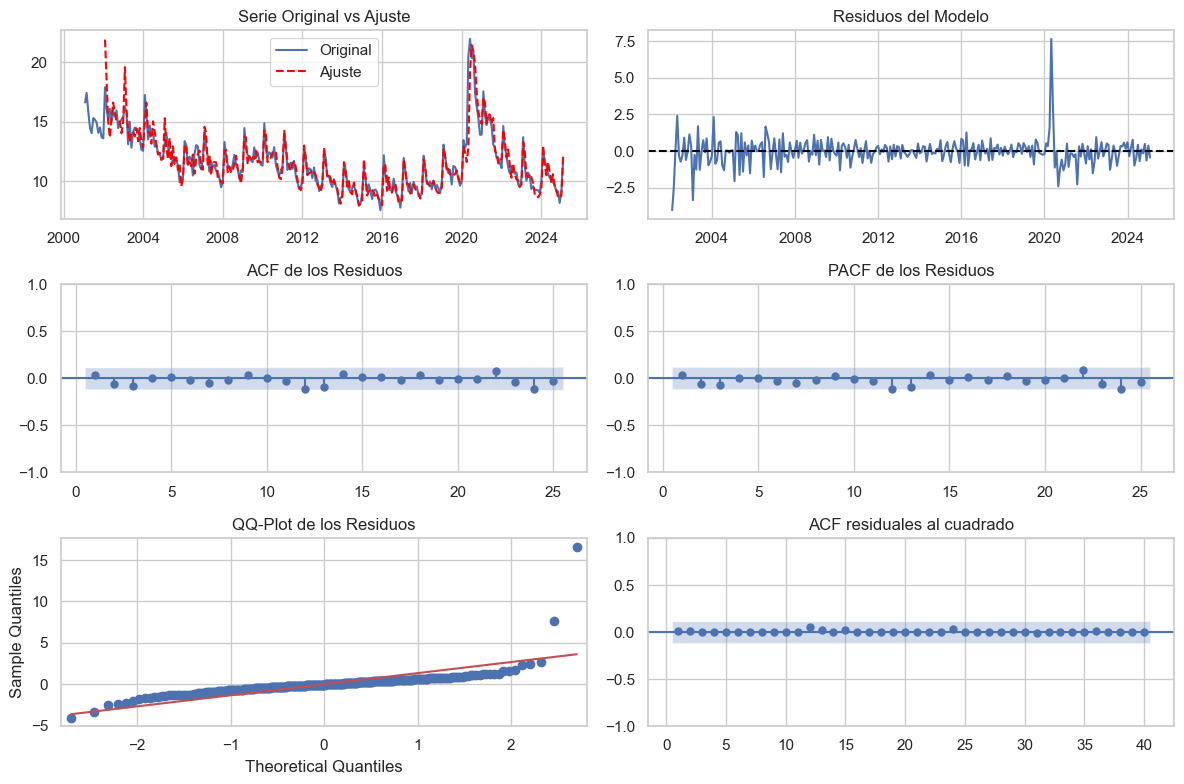

In [29]:
# Diagnóstico del modelo
residuals = modelo_1.resid

# Graficar residuos
fig, ax = plt.subplots(3, 2, figsize=(12, 8))
ax[0, 0].plot(z1, label="Original")
ax[0, 0].plot(modelo_1.fittedvalues[12:], color="red", linestyle="dashed", label="Ajuste")
ax[0, 0].set_title("Serie Original vs Ajuste")
ax[0, 0].legend()

ax[0, 1].plot(residuals[12:], label="Residuos")
ax[0, 1].set_title("Residuos del Modelo")
ax[0, 1].axhline(0, color="black", linestyle="dashed")

plot_acf(residuals, ax=ax[1, 0], zero=False)
ax[1, 0].set_title("ACF de los Residuos")

plot_pacf(residuals, ax=ax[1, 1], zero=False)
ax[1, 1].set_title("PACF de los Residuos")

qqplot(residuals, line='s', ax=ax[2, 0])
ax[2, 0].set_title("QQ-Plot de los Residuos")

plot_acf(residuals**2, ax[2,1], lags=40, zero=False)
ax[2, 1].set_title("ACF residuales al cuadrado")

plt.tight_layout()
plt.show()

###  Prueba de Ljung-Box (Autocorrelación en residuos)

In [30]:
lb_test = acorr_ljungbox(residuals,  return_df=True)
print("\nPrueba de Ljung-Box para Autocorrelación de Residuos:")
print(lb_test)



Prueba de Ljung-Box para Autocorrelación de Residuos:
     lb_stat  lb_pvalue
1   0.463226   0.496120
2   1.631544   0.442298
3   3.343158   0.341681
4   3.352857   0.500601
5   3.399964   0.638575
6   3.504171   0.743415
7   4.379466   0.735179
8   4.467361   0.812690
9   4.799337   0.851438
10  4.814423   0.903225


In [31]:
# Prueba de Normalidad de Jarque-Bera
jb_stat, jb_pvalue = jarque_bera(residuals)
print("\nPrueba de Normalidad de Jarque-Bera:")
print(f"Estadístico: {jb_stat}, P-valor: {jb_pvalue}")



Prueba de Normalidad de Jarque-Bera:
Estadístico: 86500.26924476659, P-valor: 0.0


In [32]:
# Prueba de Aleatoriedad (Runs Test)
runs_stat, runs_pvalue = runstest_1samp(residuals)
print("\nPrueba de Aleatoriedad (Runs Test):")
print(f"Estadístico: {runs_stat}, P-valor: {runs_pvalue}")


Prueba de Aleatoriedad (Runs Test):
Estadístico: 3.4138828567531734, P-valor: 0.0006404410582515394


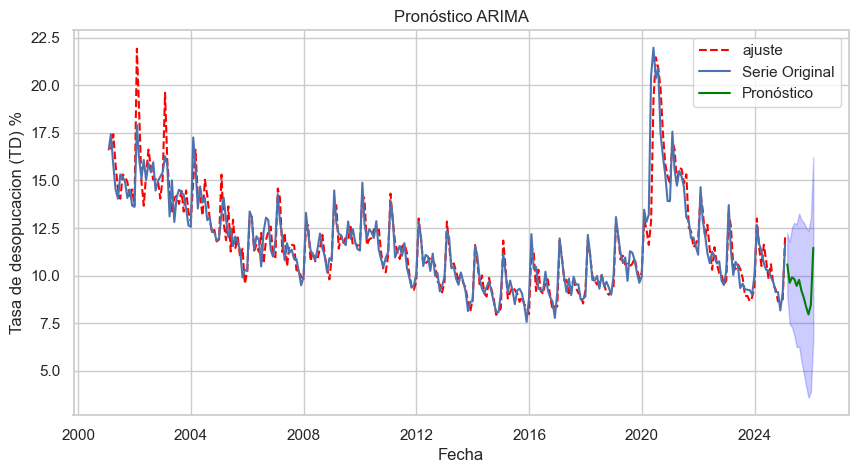

In [33]:
# Pronóstico del modelo
forecast_horizon = 12
forecast_result = modelo_1.get_forecast(steps=forecast_horizon)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(modelo_1.fittedvalues.index[1:], modelo_1.fittedvalues[1:], color="red", linestyle="dashed", label="ajuste")
# Graficar el pronóstico
plt.plot(z1, label="Serie Original")
plt.plot(forecast_mean, color="green", label="Pronóstico")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="blue", alpha=0.2)
plt.title("Pronóstico ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Tasa de desopucacion (TD) %")
plt.legend()
plt.grid(True)
plt.show()
